In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("online_retail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df.shape


(11704, 8)

In [8]:
df.columns


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11704 entries, 0 to 11703
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    11704 non-null  object 
 1   StockCode    11704 non-null  object 
 2   Description  11662 non-null  object 
 3   Quantity     11704 non-null  int64  
 4   InvoiceDate  11704 non-null  object 
 5   UnitPrice    11703 non-null  float64
 6   CustomerID   8201 non-null   float64
 7   Country      11703 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 731.6+ KB


In [10]:
df.describe()


,Quantity,UnitPrice,CustomerID
count,11704.000000,11703.000000,8201.000000
mean,7.535031,4.041108,15570.436288
std,96.815306,17.779443,1763.656238
min,-9360.000000,0.000000,12395.000000
25%,1.000000,1.250000,14237.000000
50%,2.000000,2.510000,15574.000000
75%,7.000000,4.240000,17198.000000
max,2880.000000,940.870000,18239.000000


In [12]:
df = df.dropna(subset=['CustomerID'])


In [13]:
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]


In [14]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [15]:
df['TotalSales'] = df['Quantity'] * df['UnitPrice']


In [16]:
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [17]:
df['TotalSales'].sum()


np.float64(160036.25)

In [18]:
df['InvoiceNo'].nunique()
df['CustomerID'].nunique()


323

In [19]:
country_sales = (
    df.groupby('Country')['TotalSales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
country_sales



Country
United Kingdom    144382.08
Germany             3645.49
France              2808.16
EIRE                2605.73
Norway              1919.14
Lithuania           1598.06
Spain                620.00
Italy                427.80
Australia            358.25
Belgium              346.10
Name: TotalSales, dtype: float64

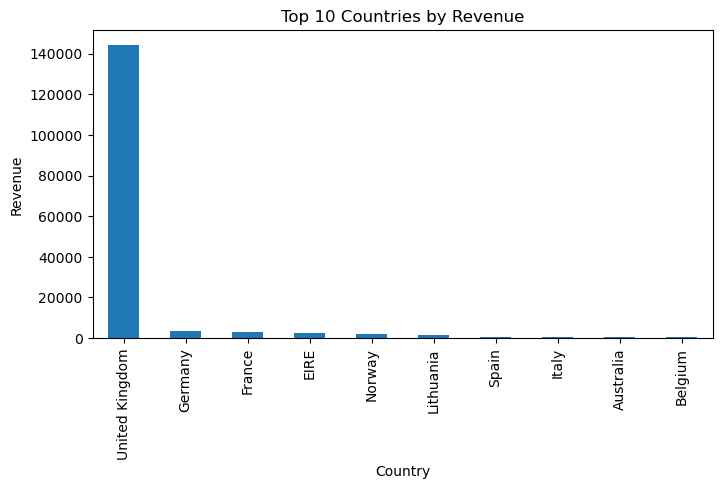

In [20]:
country_sales.plot(kind='bar', figsize=(8,4))
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Revenue")
plt.show()


In [21]:
df['Month'] = df['InvoiceDate'].dt.to_period('M')


C:\ProgramData\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


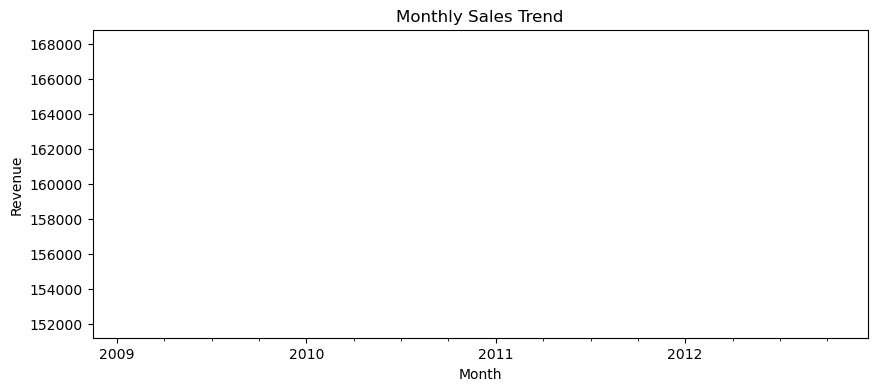

In [35]:
monthly_sales = df.groupby('Month')['TotalSales'].sum()

monthly_sales.plot(figsize=(10,4))
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


In [23]:
top_products = (
    df.groupby('Description')['TotalSales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products


Description
REGENCY CAKESTAND 3 TIER              5108.40
BLACK RECORD COVER FRAME              3786.99
WHITE HANGING HEART T-LIGHT HOLDER    2565.40
CHILLI LIGHTS                         2354.49
RED WOOLLY HOTTIE WHITE HEART.        2263.89
SET 7 BABUSHKA NESTING BOXES          1989.00
RED  HARMONICA IN BOX                 1830.25
BOX OF VINTAGE ALPHABET BLOCKS        1515.05
HAND WARMER SCOTTY DOG DESIGN         1487.10
ASSORTED COLOUR BIRD ORNAMENT         1423.92
Name: TotalSales, dtype: float64

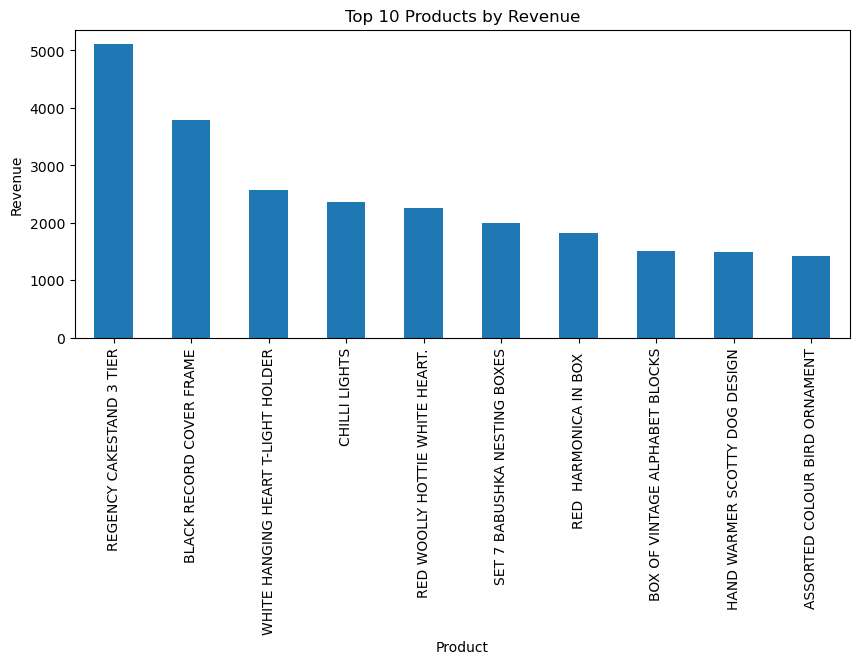

In [24]:
top_products.plot(kind='bar', figsize=(10,4))
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.show()


In [25]:
orders_per_customer = df.groupby('CustomerID')['InvoiceNo'].nunique()
orders_per_customer.describe()


count    323.000000
mean       1.325077
std        1.964646
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       34.000000
Name: InvoiceNo, dtype: float64

In [26]:
revenue_per_customer = df.groupby('CustomerID')['TotalSales'].sum()
revenue_per_customer.describe()


count     323.000000
mean      495.468266
std       851.744238
min        15.000000
25%       186.155000
50%       301.120000
75%       429.770000
max      9407.340000
Name: TotalSales, dtype: float64

In [27]:
top_customers = revenue_per_customer.sort_values(ascending=False).head(10)
top_customers


CustomerID
15061.0    9407.34
13777.0    6585.16
17850.0    5391.21
16210.0    4738.54
16029.0    4271.52
17381.0    3603.72
13081.0    2366.78
14911.0    2283.53
16754.0    2002.40
12433.0    1919.14
Name: TotalSales, dtype: float64

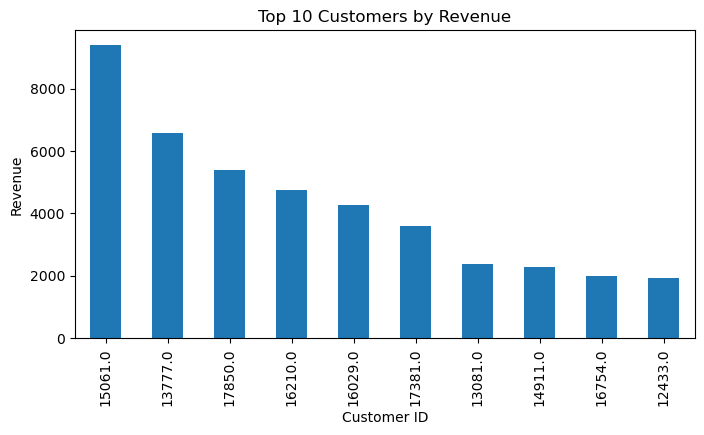

In [28]:
top_customers.plot(kind='bar', figsize=(8,4))
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Customer ID")
plt.ylabel("Revenue")
plt.show()


In [30]:
customer_segments = pd.qcut(
    revenue_per_customer,
    q=3,
    labels=['Low Value', 'Medium Value', 'High Value']
)


In [31]:
customer_segments.value_counts()


TotalSales
Low Value       108
High Value      108
Medium Value    107
Name: count, dtype: int64

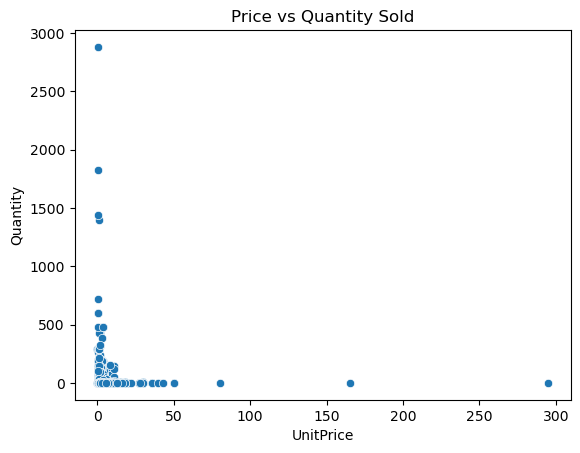

In [32]:
import seaborn as sns

sns.scatterplot(x='UnitPrice', y='Quantity', data=df)
plt.title("Price vs Quantity Sold")
plt.show()
